# FLIGHTS DELAY PREDICTION USING RF

## Introduction

This project is based on the flights data analysis where our main goal is to perform some exploratory data anlaysis on the dataset and then apply data mining algorithms to predict the delay of a flight. The dataset selected is taken from Kaggle which is a public repository for datasets. The data consists of nine features in total which contains below information:
1. ID: This act as an identifier to identify each observation in the dataset uniquely.
2. Airline: This tells us the Airline for a specific observation in the dataset.
3. AirportFrom: This tells us about the origin of flight.
4. AirportTo: This tells us about the destination of flight.
5. Flight: This tells us the flight number assigned to each flight.
6. DayOfWeek: This tells us tha day of week on whcih flight took place for each flight in the dataset.
7. Time: The time of flight is present in this column of dataset.
8. Length: The length of flight in minutes.
9. The delay which is our target variable. This is a binary classification problem. We have two possible outputs, either the flight is delayed or its not.

The dataset consists of a total of 539383 observations and it contains a mix of categorical and numerical /continuous attributes as shown and explained above. In order to be sure about what type of analysis and questions will be answered in this project, below is a highlight of what is discussed in upcoming sections:
1. Do flights which are delayed and not delayed have same or different flight length?
2. Which airline records highest number of delayed flights?
3. Which destination airport records highest number of flights delayed?
4. Build a prediction model to predict the delay.

## Methodology

This project follows the below mentioned steps from start till end with an explanation of each step:
1. Data Preprocessing.
2. Exploratory Data Analysis.
3. Data Modelling & Evaluation.
4. Results Discussion.
5. Conclusions

## Implementation

In [35]:
# Importing all the required libraries used during model building and prediction.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

### Data Preprocessing

1. Data Preprocessing: This step involves preparation of data for analysis. First of all the data is checked for null values and it is found that we do not have any null values in the dataset. The second step is to check for data imbalancing. From the histogram attached in the implementation step for Target variable, we can see that almost equal number of instances are present for both classes that is delayed flights and on time flights. Hence we can say that no data balancing issues are present. The next step is to removed unnecessary columns which includes ID and Flight number as they do not provide us any important information, hence they are removed. The continuous columns are scaled using MinMax function and the categorical columns are label encoded using label encoder and finally data is divided into training and testing set. A split of 70% for training and 30% for testing is used. 

In [36]:
# Print head of the data to see how exactly the data looks like.
data = pd.read_csv(r'Airlines.csv')
data.head(10)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
5,6,CO,1094,LAX,IAH,3,30,181,1
6,7,DL,1768,LAX,MSP,3,30,220,0
7,8,DL,2722,PHX,DTW,3,30,228,0
8,9,DL,2606,SFO,MSP,3,35,216,1
9,10,AA,2538,LAS,ORD,3,40,200,1


In [37]:
data.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [38]:
data.shape

(539383, 9)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [40]:
data.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [41]:
data.corr()

,id,Flight,DayOfWeek,Time,Length,Delay
id,1.000000,-0.006156,-0.055474,0.029156,0.020781,0.139762
Flight,-0.006156,1.000000,0.000416,-0.005750,-0.341481,-0.046175
DayOfWeek,-0.055474,0.000416,1.000000,0.001273,0.013397,-0.026199
Time,0.029156,-0.005750,0.001273,1.000000,-0.020612,0.150454
Length,0.020781,-0.341481,0.013397,-0.020612,1.000000,0.040489
Delay,0.139762,-0.046175,-0.026199,0.150454,0.040489,1.000000


### Exploratory Data Analysis
2. Exploratory Data Analysis: In this section we have highlighted three important points using data visualizations. The first one is to draw a box plot to check the Length of flight based on delay status. The second point is to check for highest delays by airline and for that purpose we have drawn a bar plot. Finally, the delays by destination are obtained. As we have almost 260+ destination airports, hence the data is sorted based on number of delays and top 10 destination airports by delay are plotted using a bar plot. The highest delay by day of week and by destination airprort is also shown in this section usin different visualizations.

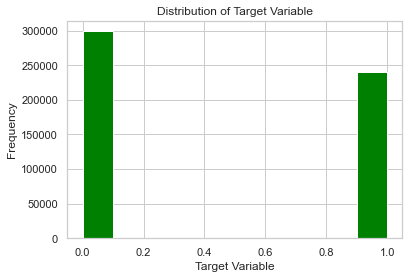

In [42]:
# See distribution of target variable. The dataset is balanced here. We can see that target column has almost equal number of 
# values belonging to class 1 and same number of instances belong to target value of 0. 
plt.hist(data['Delay'], color = "green")
plt.xlabel('Target Variable') 
plt.ylabel('Frequency') 
# displaying the title
plt.title("Distribution of Target Variable")
plt.show() 

In [43]:
data = data.drop(['id', 'Flight'], axis = 1)

<AxesSubplot:xlabel='Delay', ylabel='Length'>

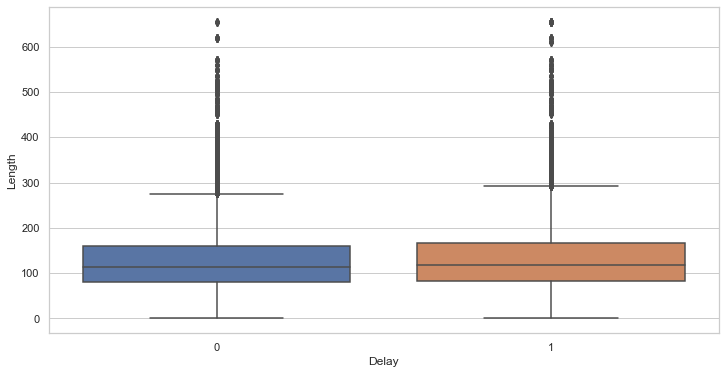

In [44]:
# Boxplot for gender vs salary
sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style("whitegrid")
sns.boxplot(x = 'Delay', y = 'Length', data = data)

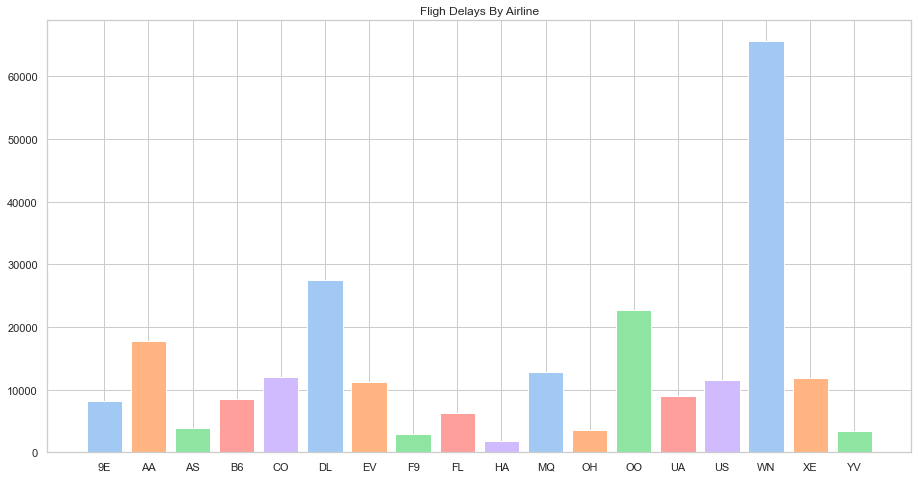

In [45]:
data_1 = data.loc[data['Delay'] == 1]
x = pd.DataFrame(data_1.groupby(['Airline']).size())
x = x.reset_index()
x. rename(columns = {0:'Count'}, inplace = True)
colors = sns.color_palette('pastel')[0:5]
#create pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x['Airline'],
       x['Count'],
      color = colors)
plt.title("Fligh Delays By Airline")
plt.show()

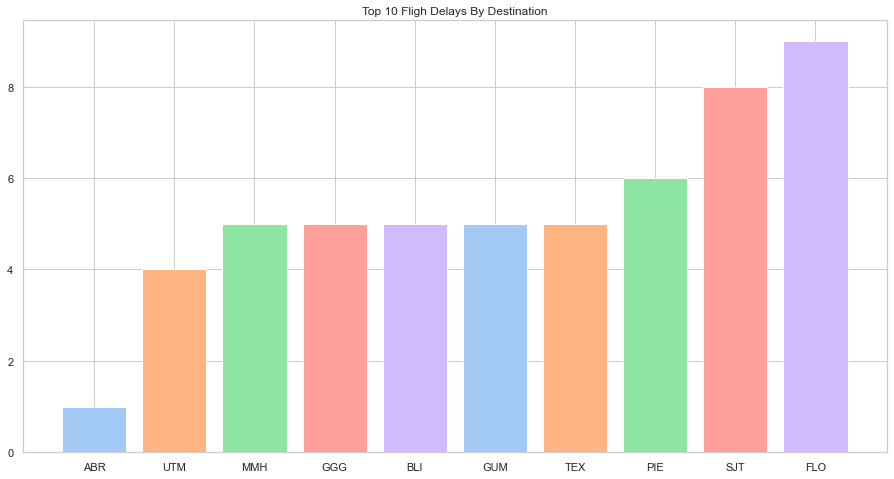

In [46]:
data_1 = data.loc[data['Delay'] == 1]
x = pd.DataFrame(data_1.groupby(['AirportTo']).size())
x = x.reset_index()
x. rename(columns = {0:'Count'}, inplace = True)
x = x.sort_values(by=['Count']) 
x = x.head(10)
colors = sns.color_palette('pastel')[0:5]
#create pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x['AirportTo'],
       x['Count'],
      color = colors)
plt.title("Top 10 Fligh Delays By Destination")
plt.show()

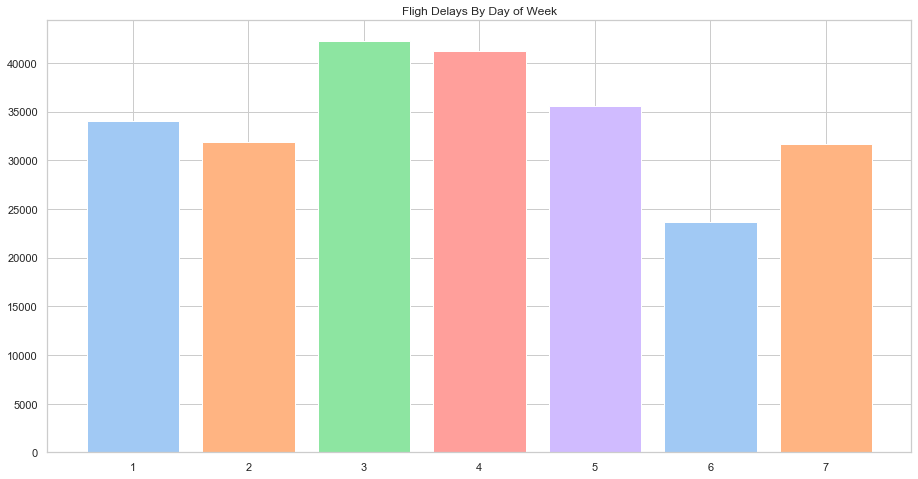

In [47]:
data_1 = data.loc[data['Delay'] == 1]
x = pd.DataFrame(data_1.groupby(['DayOfWeek']).size())
x = x.reset_index()
x. rename(columns = {0:'Count'}, inplace = True)
colors = sns.color_palette('pastel')[0:5]
#create pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x['DayOfWeek'],
       x['Count'],
      color = colors)
plt.title("Fligh Delays By Day of Week")
plt.show()

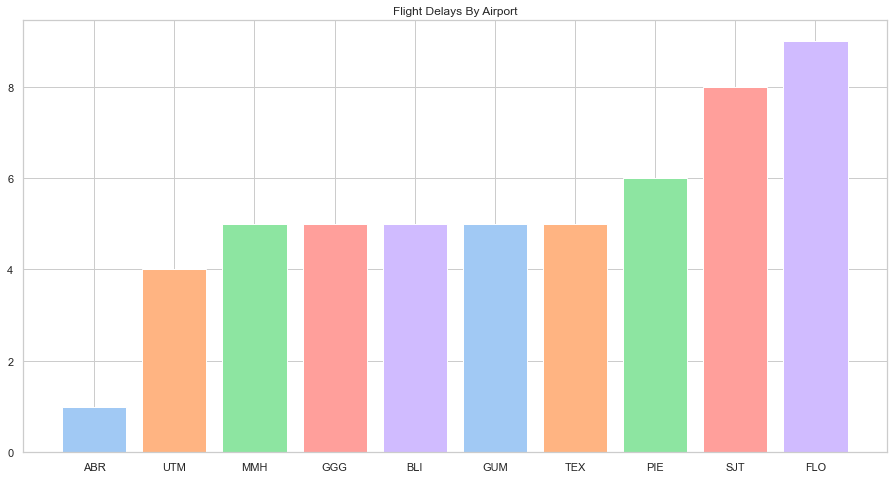

In [51]:
data_1 = data.loc[data['Delay'] == 1]
x = pd.DataFrame(data_1.groupby(['AirportTo']).size())
x = x.reset_index()
x. rename(columns = {0:'Count'}, inplace = True)
x = x.sort_values(by =['Count'])
x = x.head(10)
colors = sns.color_palette('pastel')[0:5]
#create pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x['AirportTo'],
       x['Count'],
      color = colors)
plt.title("Flight Delays By Airport")
plt.show()

### Processing Data for Modelling

This includes, scaling the numerical variables, encoding the categorical variables and splitting the data for training and testing sets with a split of 70% and 30%.

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Transform data and sclae a dataset. This process is important to bring the dataset on one scale so that the classifier
# learns and performs better.
data[['DayOfWeek',
      'Time', 
      'Length']] = MinMaxScaler().fit_transform(data[['DayOfWeek',
                                                      'Time', 
                                                      'Length']])
data.head(10)

,Airline,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,SFO,IAH,0.333333,0.003499,0.312977,1
1,US,PHX,CLT,0.333333,0.003499,0.338931,1
2,AA,LAX,DFW,0.333333,0.006998,0.251908,1
3,AA,SFO,DFW,0.333333,0.006998,0.297710,1
4,AS,ANC,SEA,0.333333,0.013996,0.308397,0
5,CO,LAX,IAH,0.333333,0.013996,0.276336,1
6,DL,LAX,MSP,0.333333,0.013996,0.335878,0
7,DL,PHX,DTW,0.333333,0.013996,0.348092,0
8,DL,SFO,MSP,0.333333,0.017495,0.329771,1
9,AA,LAS,ORD,0.333333,0.020994,0.305344,1


In [22]:
#Checking the distribution of target column. We can see that target column of value 1 has only 492 values while for target
#value 0 the instances are much larger.
data['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

In [23]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Airline']= label_encoder.fit_transform(data['Airline'])
data['AirportFrom']= label_encoder.fit_transform(data['AirportFrom'])
data['AirportTo']= label_encoder.fit_transform(data['AirportTo'])
data.head(10)

,Airline,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,4,253,135,0.333333,0.003499,0.312977,1
1,14,217,60,0.333333,0.003499,0.338931,1
2,1,154,80,0.333333,0.006998,0.251908,1
3,1,253,80,0.333333,0.006998,0.297710,1
4,2,14,252,0.333333,0.013996,0.308397,0
5,4,154,135,0.333333,0.013996,0.276336,1
6,5,154,197,0.333333,0.013996,0.335878,0
7,5,217,85,0.333333,0.013996,0.348092,0
8,5,253,197,0.333333,0.017495,0.329771,1
9,1,153,208,0.333333,0.020994,0.305344,1


In [24]:
#Separating the target column and features and meanwhile removing unnecessary columns.
X = data.drop(['Delay'], axis = 1)
y = data['Delay']

In [25]:
X.head(10)

,Airline,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,4,253,135,0.333333,0.003499,0.312977
1,14,217,60,0.333333,0.003499,0.338931
2,1,154,80,0.333333,0.006998,0.251908
3,1,253,80,0.333333,0.006998,0.297710
4,2,14,252,0.333333,0.013996,0.308397
5,4,154,135,0.333333,0.013996,0.276336
6,5,154,197,0.333333,0.013996,0.335878
7,5,217,85,0.333333,0.013996,0.348092
8,5,253,197,0.333333,0.017495,0.329771
9,1,153,208,0.333333,0.020994,0.305344


### Data Modelling & Evaluation

3. Modelling & Evaluation: The third step is to perform data modelling. We have built a random forest classifier with number of estimators set to 250 and maximum depth set to 16. Another classifier is built which is decision tree classifier. Finally, the built classifiers are tested for performance on test set. Accuracy, confusion matrix and classification report is taken into account for evaluation of built classifier.

In [26]:
#SPlit the dataset into training and testing sets, with a ratio of 70% and 30% respectively.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3)

In [27]:
#Import Random Forest Classifier and fit the model.
random.seed(124)
clf=RandomForestClassifier(n_estimators = 250,
                          max_depth = 16)
clf.fit(X_train,
        y_train)

RandomForestClassifier(max_depth=16, n_estimators=250)

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth = 50)
dt.fit(X_train,
       y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


### Model Evaluation

Confusion Matrix is a diagram that shows the differences between actual and predicted values. It has a table-like shape and assesses how well our machine learning classification model performs. It displays the various contrasts between actual and predicted values. Let's define each one separately.
1. True Positives (TP) are values that both turned out to be positive and were expected to be positive.
2. False Positives, or FPs, are values that were genuinely anticipated to be negative but turned out to be positive. known also as a Type I error.
3. False Negatives, or FNs, are values that were projected as negative but were really positive. Error of the same kind as Type II.
4. True Negative values are those that were both genuinely negative and projected to be negative.

In [28]:
y_pred=clf.predict(X_test)
print("Accuracy:",
      metrics.accuracy_score(y_test, 
                             y_pred))

Accuracy: 0.666316472514909


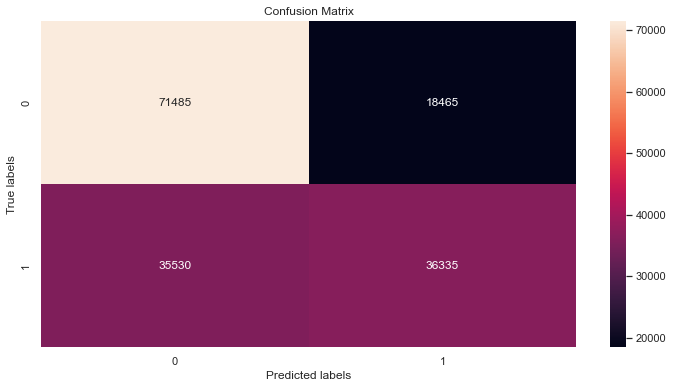

In [29]:
cm = confusion_matrix(y_test, y_pred)
labels = ['1', '0']
ax= plt.subplot()
sns.heatmap(cm, 
            annot = True, 
            fmt = 'g', 
            ax = ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['0', '1']); 
ax.yaxis.set_ticklabels(['0', '1']);

In [30]:
print(classification_report(y_test, 
                            y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73     89950
           1       0.66      0.51      0.57     71865

    accuracy                           0.67    161815
   macro avg       0.67      0.65      0.65    161815
weighted avg       0.67      0.67      0.66    161815



In [53]:
y_pred = dt.predict(X_test)
print("Accuracy:",
      metrics.accuracy_score(y_test, 
                             y_pred))

Accuracy: 0.6089114111794333


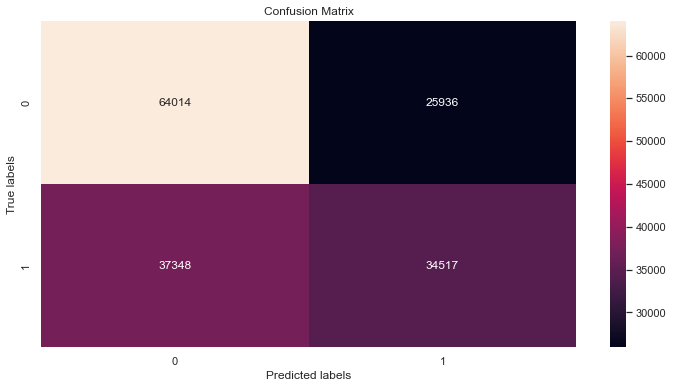

In [54]:
cm = confusion_matrix(y_test, y_pred)
labels = ['1', '0']
ax= plt.subplot()
sns.heatmap(cm, 
            annot = True, 
            fmt = 'g', 
            ax = ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['0', '1']); 
ax.yaxis.set_ticklabels(['0', '1']);

In [55]:
print(classification_report(y_test, 
                            y_pred))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67     89950
           1       0.57      0.48      0.52     71865

    accuracy                           0.61    161815
   macro avg       0.60      0.60      0.60    161815
weighted avg       0.60      0.61      0.60    161815



### ROC Curve For Random Forest Classifier

An indicator of performance for classification issues at different threshold levels is the AUC-ROC curve. AUC stands for the level or measurement of separability, while ROC is a probability curve. It reveals how well the model can differentiate across classes. The model is more accurate at classifying 0 classes as 0, and classifying 1 classes as 1, the higher the AUC. By example, the model is more effective at differentiating between individuals with the condition and those who do not have it the higher the AUC. TPR is plotted against FPR on the ROC curve, with FPR on the x-axis and TPR on the y-axis. The ROC Curve is attached below. The AUC thus obtained is 71 in this case.

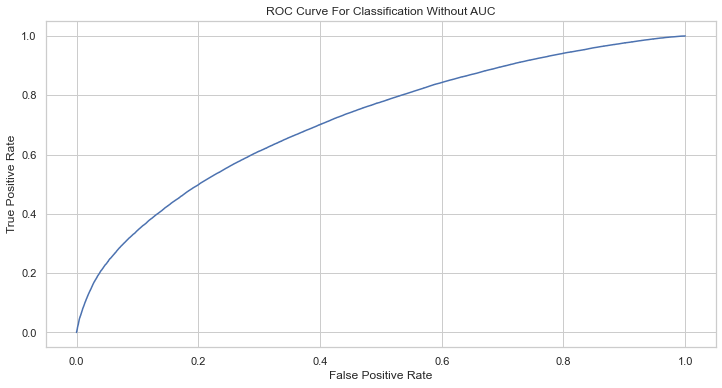

In [33]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve For Classification Without AUC")
plt.show()

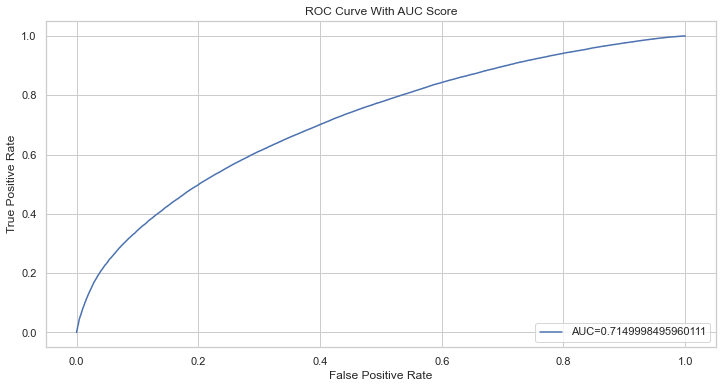

In [34]:
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve With AUC Score")
plt.legend(loc=4)
plt.show()

### ROC Curve For Decision Tree Classifier

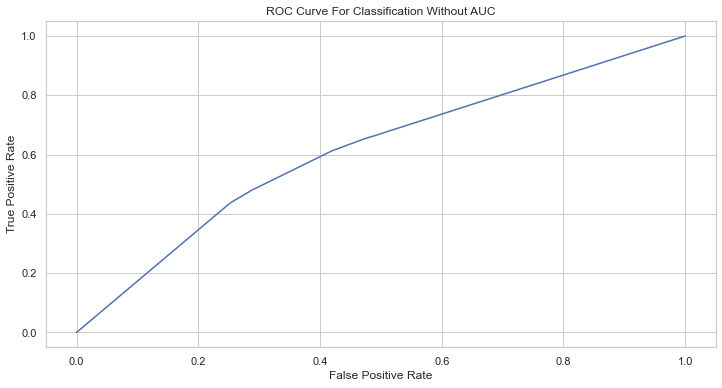

In [56]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve For Classification Without AUC")
plt.show()

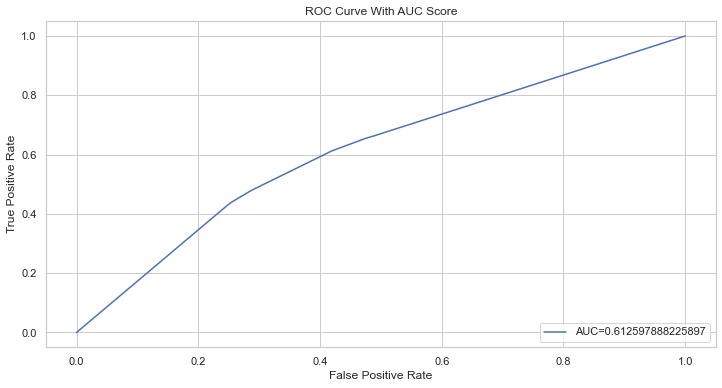

In [57]:
#define metrics
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve With AUC Score")
plt.legend(loc=4)
plt.show()

## Results

Coming towards the result of exploratory data analysis first, it is found that the average length of flight has no effect on flight being delayed or flight being on time. Both have approximately same length. The highest number of flight delays are experienced by WN airline. If we talk about top 3 airlines by highest number of delays then WN, DL and OO are top 3 airlines which has highest delays. Finally, the destination airport experiencing highest number of delay is FLO. If we talk about top 3, the FLO, SJT and PIE tops the list. The random forest classifier is trained and tested on training and testing sets. We found out that the accuracy of our classifier on unseen test dataset is 66% which could further be improved by applying hyperparameter tuning techniques. The confusion matrix and classification report are attached in the implementation step. The ROC curve with and without AUC is also attached and it can be seen that the AUC value for random forest classifier is 71. This tells us about the area that is being covered by the model. The ROC curve for the decision tree classifier is 61.

## Conclusions:

Concluding this project, we have performed data preprocessing and data cleaning to make our data ready to use and highlighted some points based on which someone can make informed decisions. More deeper analysis and predcitive modelling could be performed given more data about flights. We found out that WN airline is performing very bad in term of delays, there is always a delay on destination airport FLO and that the classifier could preidct accurately upto 66% on unseen data for predicting the delay. Furthermore, we can highlight which day of week records the highest delays, is time a factor in delays or not and many more.